In [24]:
import csv
import matplotlib.pyplot as plt
import platform

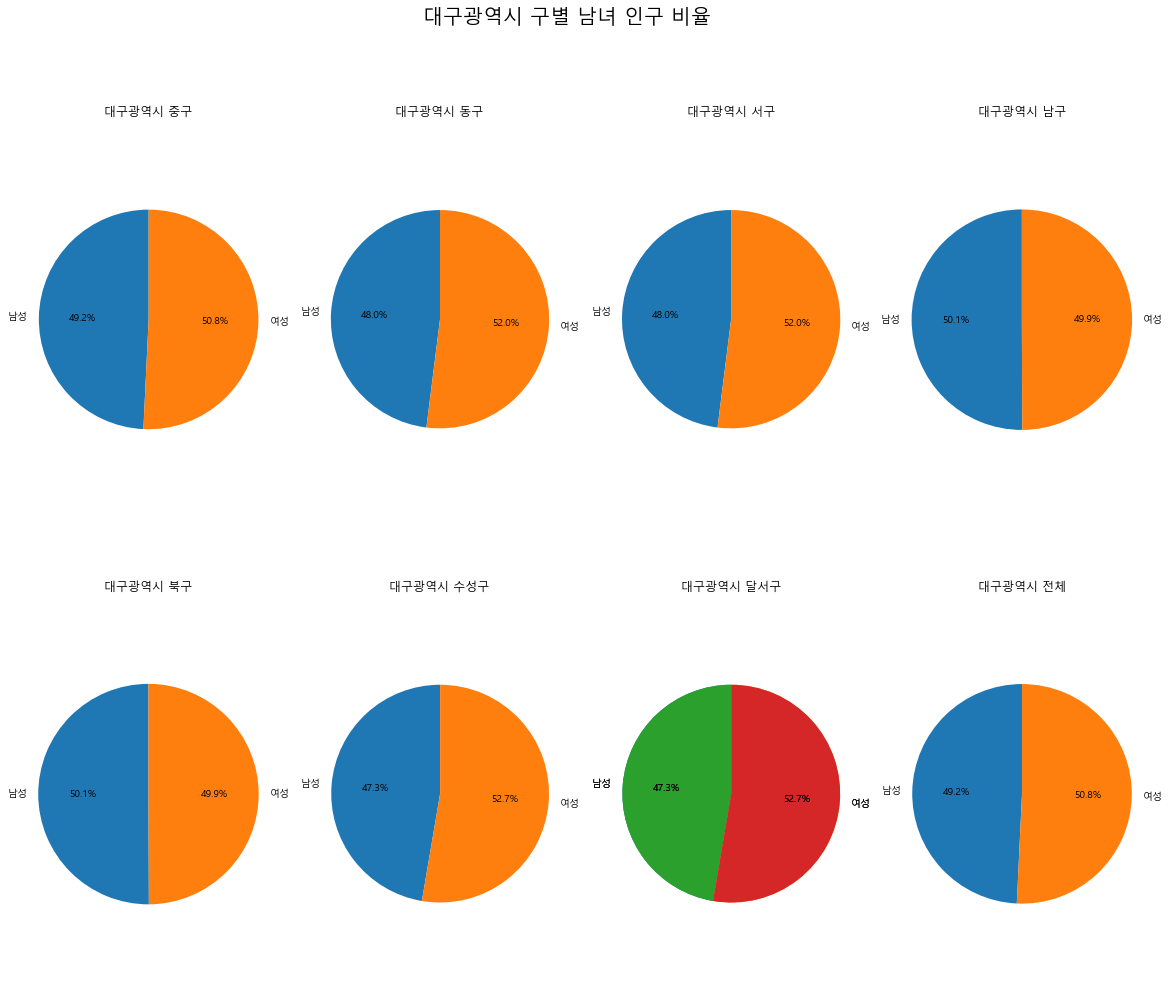

In [56]:
f = open('../../공공데이터수업과제/Data/gender.csv', mode='r', encoding='utf-8')
data = csv.reader(f)
next(data)

rate = []
city = '대구광역시 '
daegu_district = ['중구', '동구', '서구', '남구', '북구', '수성구', '달서구']

for row in data:
	if city in row[0]:
		man_rate = (int(row[104]) * 100 / int(row[1]))
		woman_rate = (100 - man_rate)
		rate.append((man_rate, woman_rate))			
	for district in daegu_district:
		d = city + district
		if d in row[0]:
			man_rate = (int(row[104]) * 100 / int(row[1]))
			woman_rate = (100 - man_rate)
			rate.append((man_rate, woman_rate))			


if platform.system() == 'Windows':
	plt.rc('font', family='Malgun Gothic')
else:
	plt.rc('font', family='AppleGothic')

fig, axes = plt.subplots(2, 4, figsize=(20, 16))
fig.suptitle(city + '구별 남녀 인구 비율', fontsize=20)

for i in range(8):
	if i != 7:
		plt.subplot(2, 4, i+1)
		plt.pie(rate[i], labels=['남성', '여성'], autopct='%.1f%%', startangle=90)
		plt.title(city + daegu_district[i])
		plt.axis('equal')
	else:
		plt.subplot(2, 4, i)
		plt.pie(rate[i-1], labels=['남성', '여성'], autopct='%.1f%%', startangle=90)
		plt.title(city + daegu_district[i-1])
		plt.axis('equal')

# 대구 전체 인구 남녀 비율
plt.subplot(2, 4, 8)
plt.pie(rate[0], labels=['남성', '여성'], autopct='%.1f%%', startangle=90)
plt.title(city + '전체')
plt.axis('equal')
plt.show()
